In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

print ('All modules ready')

All modules ready


In [13]:
df = pd.read_csv(r"D:\archive\car_purchasing.csv",encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [15]:
df.drop(columns = ['customer name', 'customer e-mail', 'country'], inplace = True)
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [16]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [17]:
X = df.drop ("car purchase amount", axis = 1)
X.head()

,gender,age,annual Salary,credit card debt,net worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [18]:
y = df['car purchase amount']
y.head()

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
Name: car purchase amount, dtype: float64

In [19]:
Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)
y = Scaler.fit_transform(y.values.reshape(-1,1))

# reshaping y values to be column vector

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(400, 5)
(100, 5)
(400, 1)
(400, 1)


In [21]:
model = Sequential([
    Dense(16, activation ='relu', input_dim = 5),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'linear')
])

model.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, epochs =50, validation_split= 0.2)

Epoch 1/50
10/10 [==============================] - 1s 38ms/step - loss: 0.0298 - mean_absolute_error: 0.1439 - val_loss: 0.0231 - val_mean_absolute_error: 0.1216
Epoch 2/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0177 - mean_absolute_error: 0.1081 - val_loss: 0.0146 - val_mean_absolute_error: 0.0979
Epoch 3/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0923 - val_loss: 0.0130 - val_mean_absolute_error: 0.0934
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0846 - val_loss: 0.0119 - val_mean_absolute_error: 0.0867
Epoch 5/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0779 - val_loss: 0.0098 - val_mean_absolute_error: 0.0808
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0719 - val_loss: 0.0080 - val_mean_absolute_error: 0.0729
Epoch 7/50
10/10 [=========

Epoch 50/50
10/10 [==============================] - 0s 8ms/step - loss: 1.4003e-04 - mean_absolute_error: 0.0087 - val_loss: 3.1413e-04 - val_mean_absolute_error: 0.0128


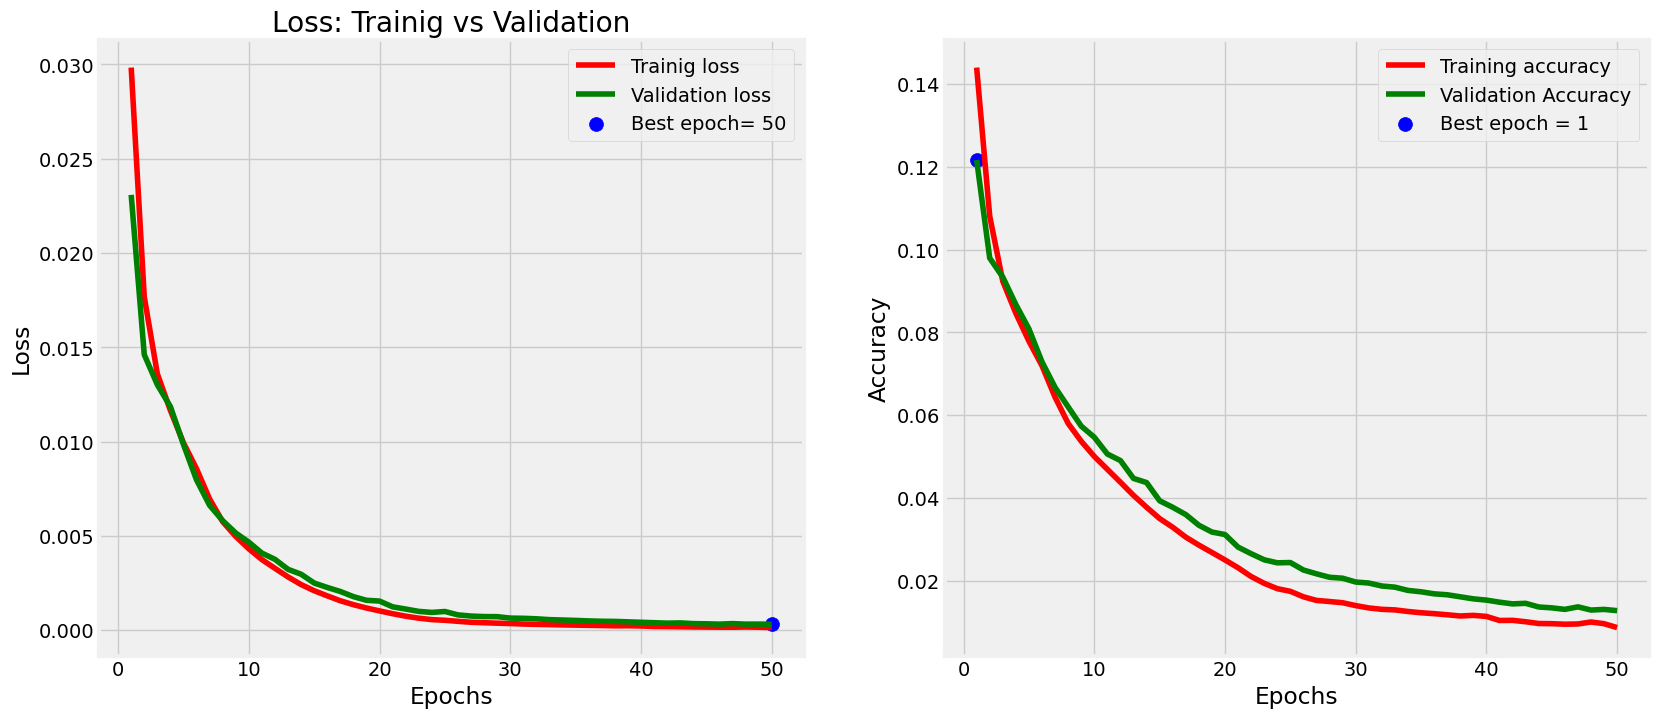

In [23]:
# training accuracy and loss
acc = history.history['mean_absolute_error']
loss = history.history['loss']


#validation accuracy and loss
v_acc = history.history['val_mean_absolute_error']
v_loss = history.history['val_loss']


#index of lowest v_loss
ind_vloss = np.argmin(v_loss)
lowest_vloss = v_loss[ind_vloss]


#index of highest v_acc
ind_vacc = np.argmax(v_acc)
heighest_vacc = v_acc[ind_vacc]


#number of epochs
epochs = [i +1 for i in range(len(acc))]

#set labels
loss_l = f'Best epoch= {str(ind_vloss +1)}'
acc_l= f'Best epoch = {str(ind_vacc +1)}'


#trainig History visualization
plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'r', label = 'Trainig loss')
plt.plot(epochs, v_loss, 'g', label = 'Validation loss')
plt.scatter(ind_vloss +1, lowest_vloss, s = 100, c= 'b', label = loss_l)
plt. title('Loss: Trainig vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, v_acc, 'g', label = 'Validation Accuracy')
plt.scatter(ind_vacc+1, heighest_vacc, s = 100, c = 'b', label = acc_l)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [24]:
y_pred  = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [25]:
r2_score(y_test, y_pred)

0.9917993562425779